In [1]:
from pathlib import Path
import sys
sys.path.append("../..") # go to parent dir

In [2]:
from aspects.analysis.statistics_bing_liu import (
    get_aspect_frequency_ranking, 
    load_reviews, 
    get_aspects,
    get_datasets_sizes,
)
from aspects.analysis.statistics_rst_graphs import (
    get_aspect_ranking_based_on_rst_and_pagerank, 
    ASPECTS_GRAPH_PATHS
)

from scipy import stats

In [3]:
from os.path import basename
from operator import itemgetter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

from sklearn import preprocessing
from scipy import stats

%matplotlib inline

In [ ]:
from aspects.utilities.data_paths import IOPaths
from embedisualization.embedisualization import Embedisualisation

In [5]:
ROOT_ASPECT_PATH = Path.cwd().parent.parent
ROOT_ASPECT_PATH

PosixPath('/home/lukasz/github/phd/sentiment-backend')

In [6]:
all_reviews_path = Path(ROOT_ASPECT_PATH, 'aspects', 'data', 'aspects', 'Reviews-9-products')

In [7]:
all_reviews_path

PosixPath('/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products')

In [8]:
reviews_paths = [p.as_posix() for p in all_reviews_path.glob('*')]

In [9]:
reviews_paths

['/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/MicroMP3.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/Canon S100.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/norton.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/Diaper Champ.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/Hitachi router.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/ipod.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/Nokia 6600.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/Linksys Router.txt',
 '/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/Canon PowerShot SD500.txt']

In [10]:
def draw_aspect_distribution(reviews_path: str):
    df = get_aspects(reviews_path)
    plt.figure(figsize=(20, 8))
    plt.title(f'Aspect distribution for {reviews_path}')
    counts = df.aspect.value_counts()
    # take only aspects that appeared at least once 
    counts[counts > 1].plot(kind='bar')
    aspects = list(counts.index)
    print(aspects)
    return aspects

In [11]:
from os.path import basename

/home/lukasz/github/phd/sentiment-backend/aspects/data/aspects/Reviews-9-products/MicroMP3.txt
['player', 'sound', 'look', 'storage', 'size', 'features', 'touchpad', 'software', 'battery life', 'design', 'sound quality', 'interface', 'headphones', 'zen micro', 'battery', 'accessories', 'fm reception', 'price', 'working', 'earbuds', 'fm tuner', 'functioning', 'touch pad', 'headphone jack', 'feel', 'case', 'navigation', 'bass', 'construction', 'audio quality', 'firmware', 'ease of use', 'looks', 'durability', 'transfer speed', 'stand', 'organization', 'format', 'extra features', 'quality', 'file transfer', 'microphone', 'installation', 'creative', 'zen', 'belt clip', 'support', 'bag', 'charging', 'scroll bar', 'cost', 'built', 'portability', 'screen review', 'back', 'controls', 'radio', 'battery usage', 'compatibility', 'feature', 'instruction', 'color', 'comfort', 'small', 'functionality', 'touch-pad', 'user interface', 'touchpad controls', 'fm receiver', 'cable', 'made', 'music source 

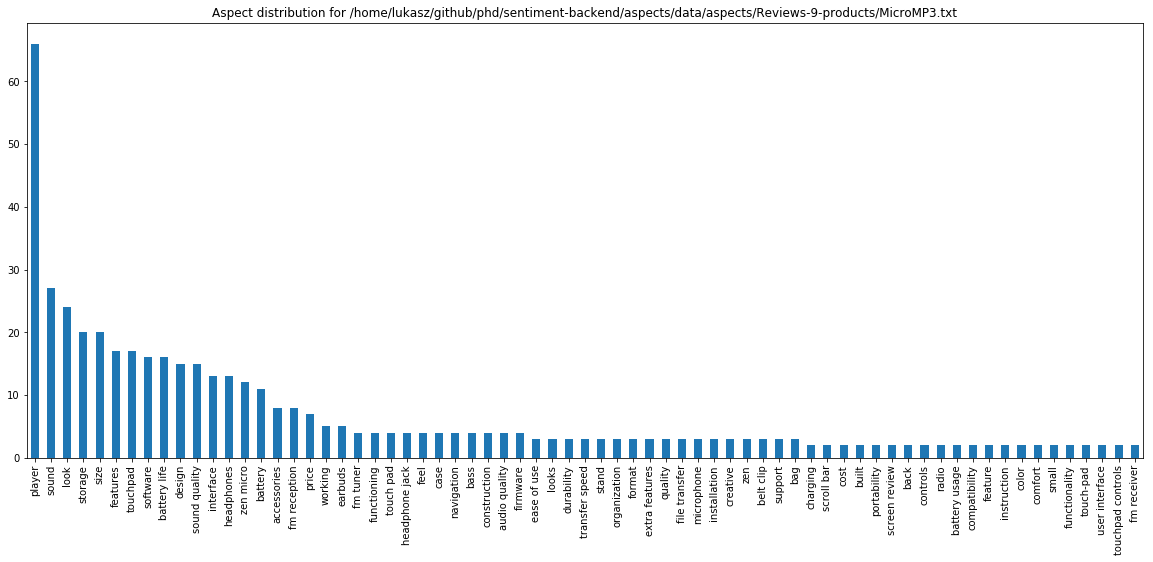

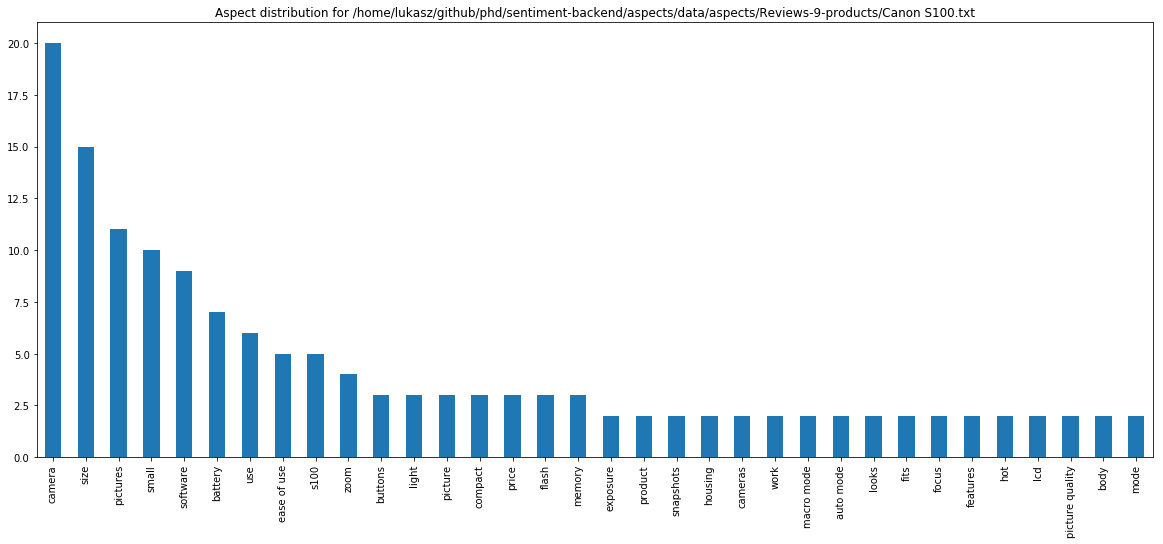

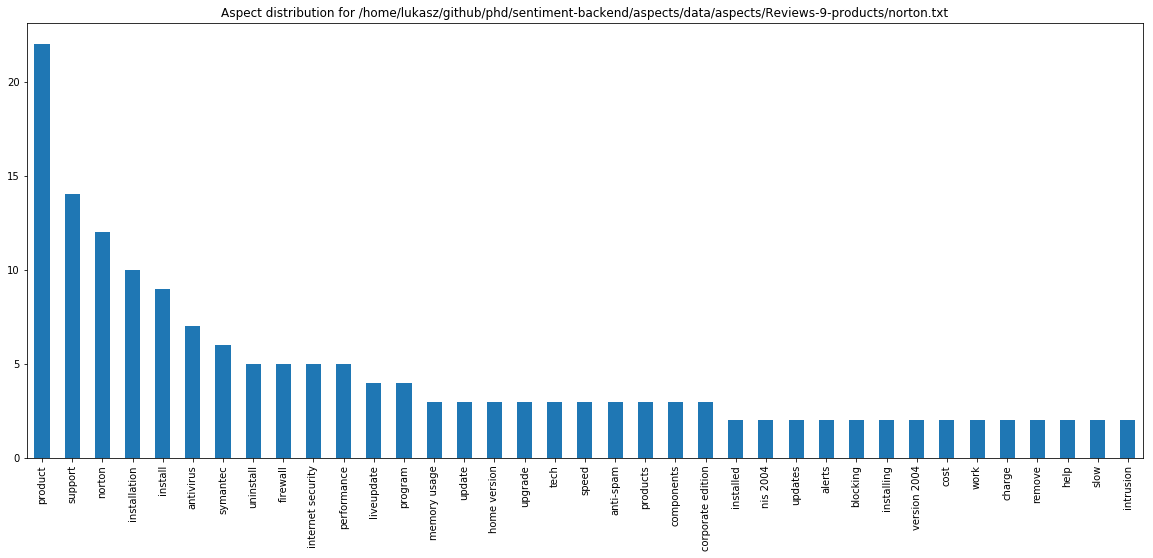

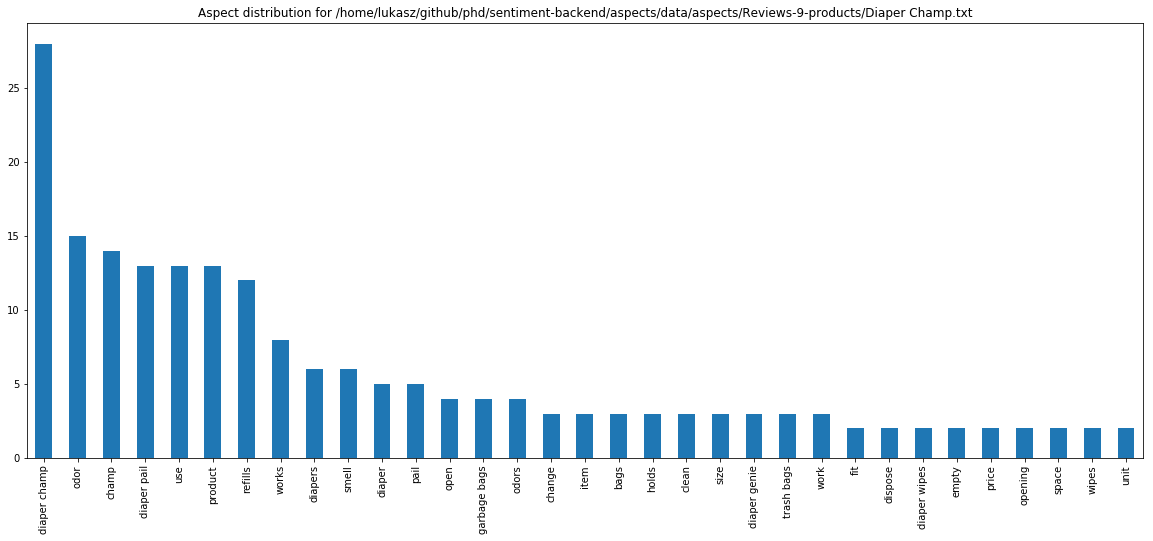

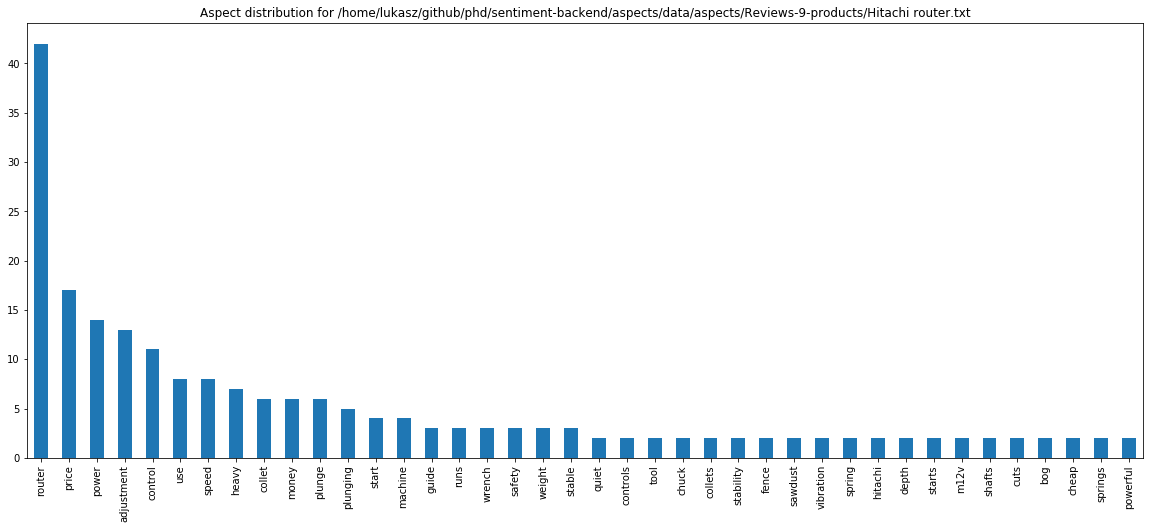

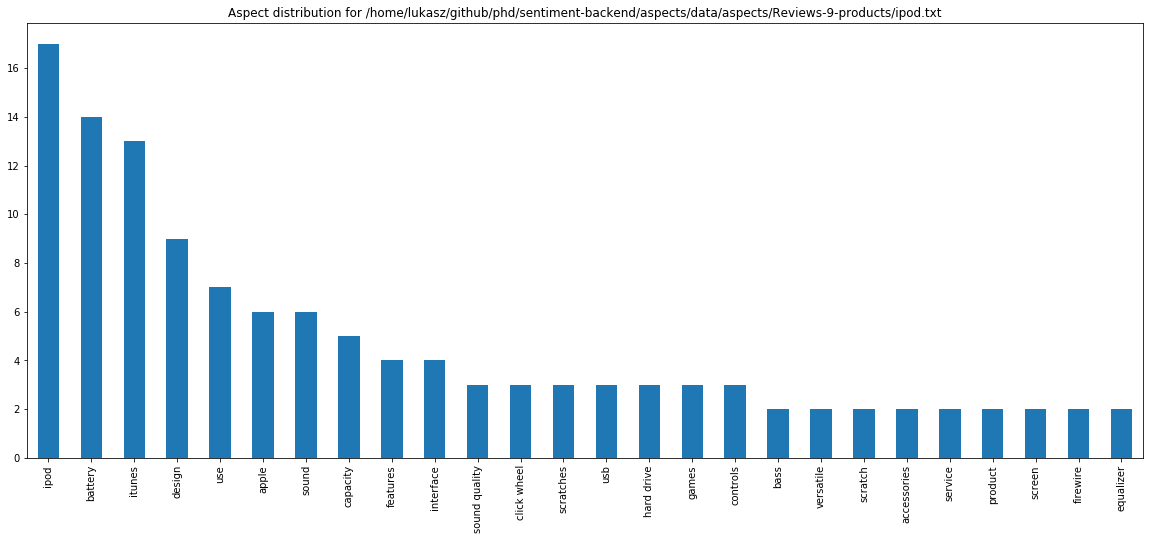

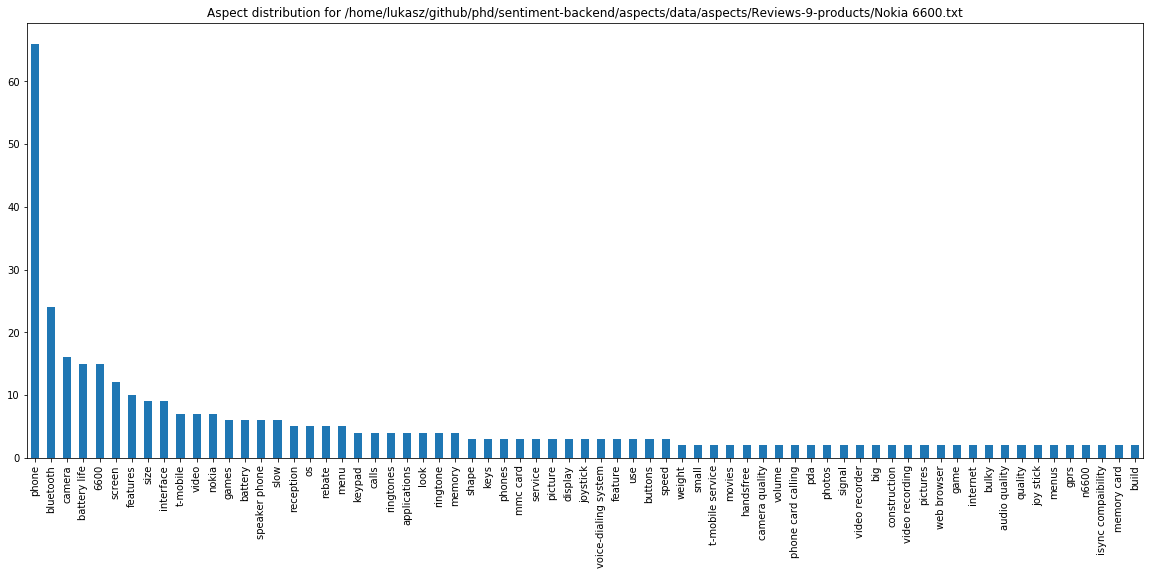

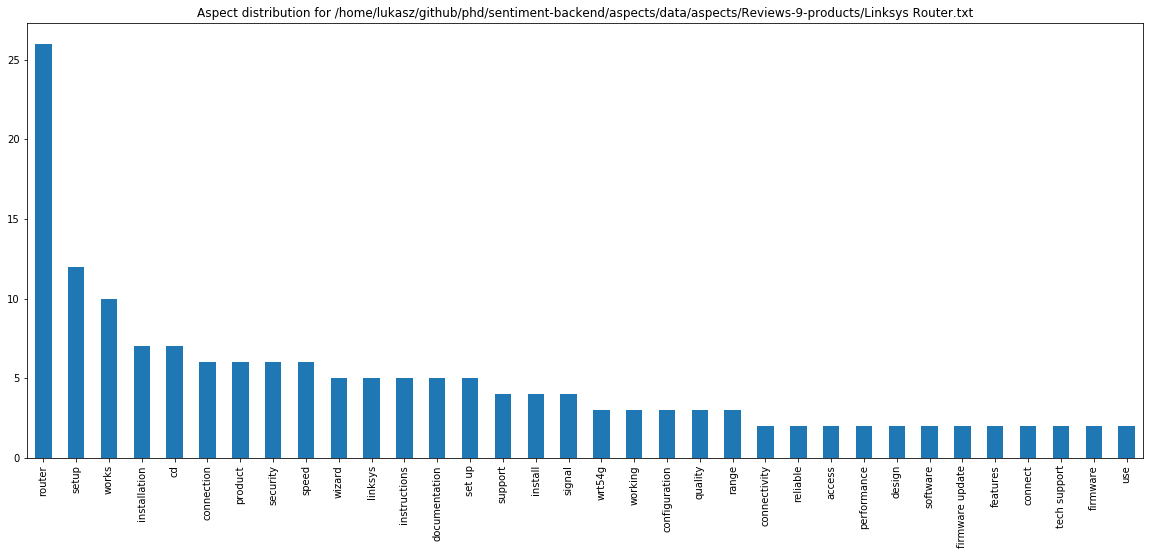

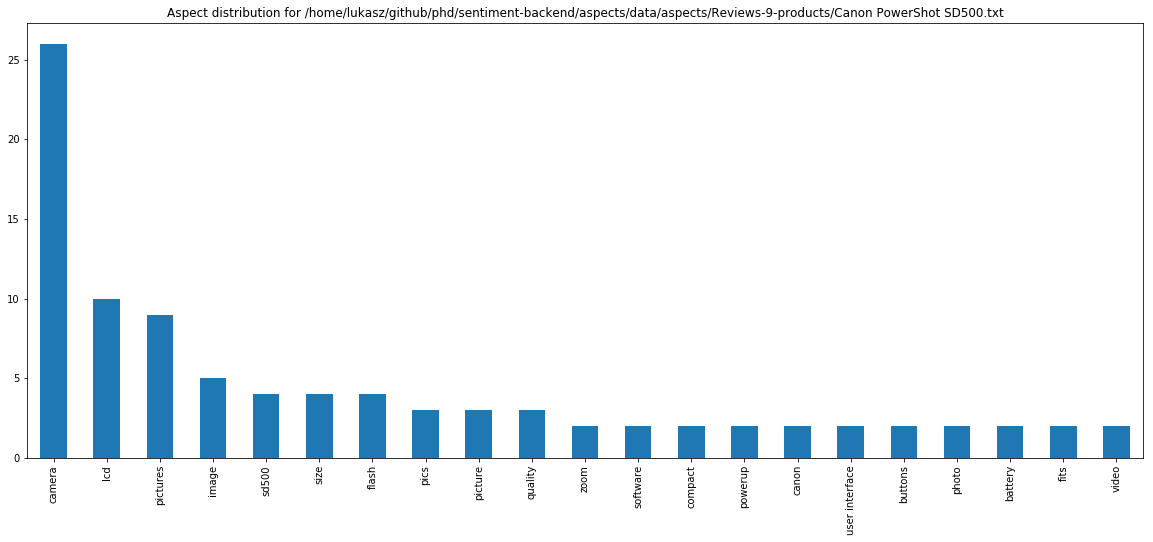

In [12]:
aspects = {}
for reviews_path in reviews_paths:
    print(reviews_path)
    aspects[basename(reviews_path)] = draw_aspect_distribution(reviews_path)

In [46]:
get_datasets_sizes(reviews_paths).columns

Index(['dataset', 'size', 'reviews_word_average', 'aspect_coverage'], dtype='object')

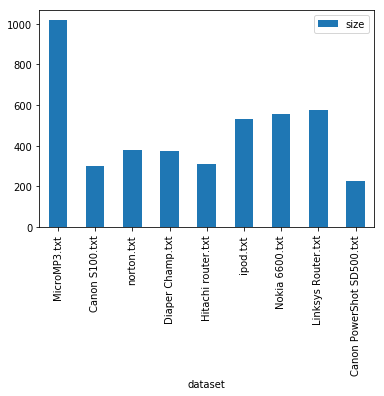

In [47]:
get_datasets_sizes(reviews_paths).plot(kind='bar', x='dataset', y='size')

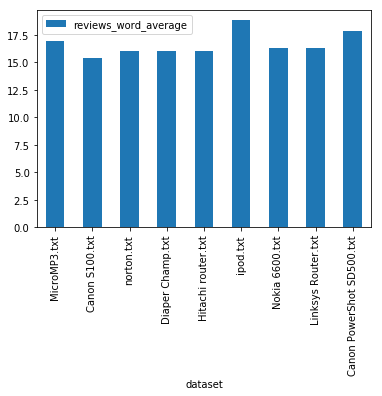

In [14]:
get_datasets_sizes(reviews_paths).plot(kind='bar', x='dataset', y='reviews_word_average')

In [15]:
get_datasets_sizes(reviews_paths)

,dataset,size,reviews_word_average,aspect_coverage
0,MicroMP3.txt,1018,16.987230,0.475442
1,Canon S100.txt,300,15.440000,0.576667
2,norton.txt,380,16.042105,0.557895
3,Diaper Champ.txt,375,16.077333,0.565333
4,Hitachi router.txt,312,16.054487,0.634615
5,ipod.txt,531,18.854991,0.303202
6,Nokia 6600.txt,554,16.312274,0.684116
7,Linksys Router.txt,575,16.292174,0.333913
8,Canon PowerShot SD500.txt,229,17.864629,0.550218


# 

In [14]:
aspects.keys()

dict_keys(['MicroMP3.txt', 'Canon S100.txt', 'norton.txt', 'Diaper Champ.txt', 'Hitachi router.txt', 'ipod.txt', 'Nokia 6600.txt', 'Linksys Router.txt', 'Canon PowerShot SD500.txt'])

In [15]:
aspects['MicroMP3.txt'][:2]

['player', 'sound']

In [17]:
aspects['ipod.txt'][:2]

['ipod', 'battery']

In [ ]:
emb = Embedisualisation(texts=aspects['ipod.txt'], num_clusters=10)

In [ ]:
emb.create_d3_visualisation()